93


/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.494e-03, tolerance: 2.011e-03
  model = cd_fast.enet_coordinate_descent(
/Users/iskander/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.610e-03, tolerance: 2.025e-03
  model = cd_fast.enet_coordinate_descent(


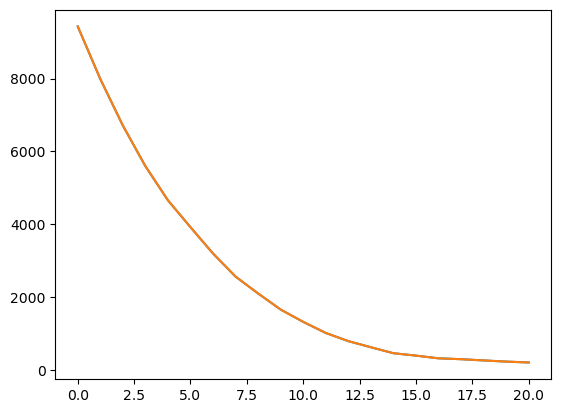

In [5]:
from matplotlib.pyplot import plot
import golfy
import numpy as np 
from golfy.evaluation import evaluate_design
from golfy.optimization import improve_solution
num_peptides = 400
r = 3
max_peptides_per_pool=13
s = golfy.initialization.init(num_peptides = num_peptides, 
                              num_replicates=r, max_peptides_per_pool=max_peptides_per_pool, strategy='random')

print(s.num_pools())

peptides = np.arange(num_peptides)
for i in range(r):
    for g in range(num_peptides // max_peptides_per_pool):
        s.assignments[i][g] = peptides[g * max_peptides_per_pool:(g + 1) * max_peptides_per_pool]
        
n_iters = 20
history = [evaluate_design(s)]
for i in range(n_iters):
    improve_solution(s)
    history.append(evaluate_design(s))


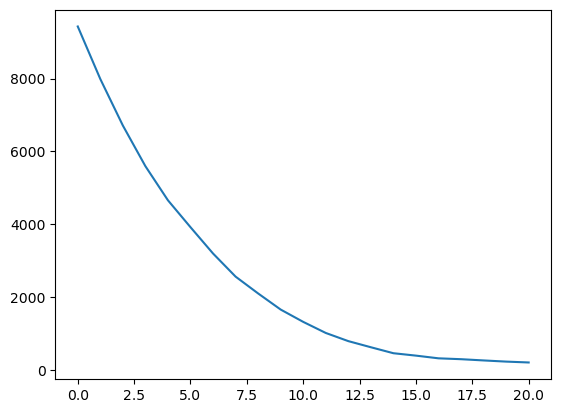

In [6]:

plot(np.arange(n_iters + 1), [x.num_violations for x in history])


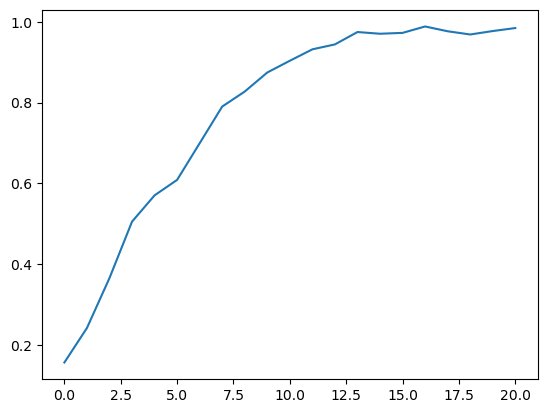

In [7]:
plot(np.arange(n_iters + 1), [x.f1 for x in history])

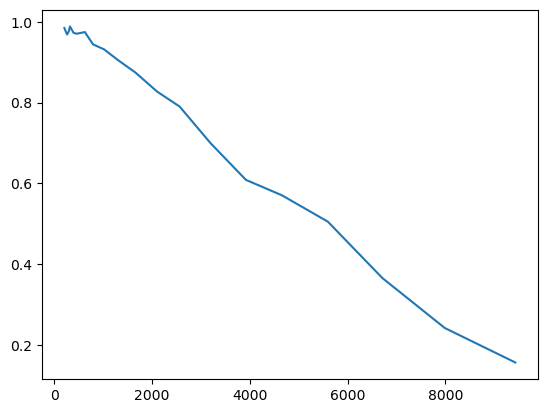

In [8]:
plot([x.num_violations for x in history], [x.f1 for x in history])